# HM1 - Serie 9

## Aufgabe 2: INF-Norm, Konditionszahl & Relativer Fehler

In [60]:
import numpy as np

def Gruppe_S9_Aufg2(A, A_err, b, b_err):
    x = np.linalg.solve(A,b)
    x_err = np.linalg.solve(A_err, b_err)

    condA = np.linalg.cond(A, np.inf)
    Adiff = np.linalg.norm(A - A_err, np.inf) / np.linalg.norm(A, np.inf)
    bdiff = np.linalg.norm(b - b_err, np.inf) / np.linalg.norm(b, np.inf)
    if condA * Adiff < 1:
        dx_max = (condA / (1-condA * Adiff)) * (Adiff + bdiff)
    else:
        dx_max = 'NaN'

    dx_obs = np.linalg.norm(x - x_err, np.inf) / np.linalg.norm(x, np.inf)

    return x, x_err, dx_max, dx_obs

## Aufgabe 3: Obere Schranke für dx_obs

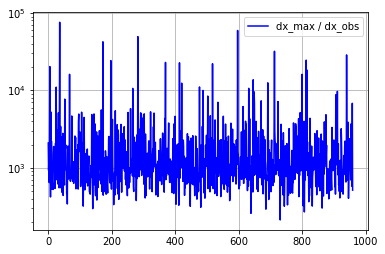

In [61]:
import matplotlib.pyplot as plt
import numbers

data = []
for i in range(1000):
    A = np.random.rand(100,100)
    A_err = np.add(A,  np.random.rand(100,100)/1e5)
    b = np.random.rand(100,1)
    b_err = np.add(b, np.random.rand(100,1)/1e5)
    _, _, dx_max_res, dx_obs_res = Gruppe_S9_Aufg2(A, A_err, b, b_err)
    if isinstance(dx_max_res, numbers.Number):
        data.append([dx_max_res, dx_obs_res, dx_max_res / dx_obs_res])

out = np.array(data)
plt.semilogy(out[:,2], color="blue", label="dx_max / dx_obs")
plt.legend()
plt.grid()
plt.show()